<a href="https://colab.research.google.com/github/Aminfaraji/ABINetpaddleocr/blob/main/ABINetpaddleocr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
# !nvidia-smi
# !pip install xformers==v0.0.22
# !pip install mmcv-full==1.3.13 -f https://download.openmmlab.com/mmcv/dist/cu102/torch1.9.0/index.html


In [ ]:
# !python -m pip install paddlepaddle-gpu==2.4.1.post112 -f https://www.paddlepaddle.org.cn/whl/linux/mkl/avx/stable.html
# !python -m pip install paddlepaddle-gpu==2.5.2.post102 -f https://www.paddlepaddle.org.cn/whl/linux/mkl/avx/stable.html
!python3 -m pip install paddlepaddle-gpu==2.6.1.post120 -f https://www.paddlepaddle.org.cn/whl/linux/mkl/avx/stable.html
!git clone https://github.com/PaddlePaddle/PaddleOCR.git
%cd /content/PaddleOCR
!pip install -r requirements.txt

In [ ]:
%cd /content/PaddleOCR
!mkdir pretrained_model
%cd pretrained_model/
!unzip /content/drive/MyDrive/IDPL2.zip
# !wget https://paddleocr.bj.bcebos.com/rec_r45_abinet_train.tar
# !tar -xf rec_r45_abinet_train.tar && rm -rf rec_r45_abinet_train.tar

In [ ]:
!rm -rf /content/PaddleOCR/train_data

In [ ]:
# !mkdir /content/PaddleOCR/train_data
# !unzip /content/drive/MyDrive/IDPL-PFOD2-dataset/train.zip -d /content/PaddleOCR/train_data
# !unzip /content/drive/MyDrive/IDPL-PFOD2-dataset/val.zip -d /content/PaddleOCR/train_data
!cp /content/drive/MyDrive/IDPL-PFOD2-dataset/val.txt -r /content/PaddleOCR/train_data
!cp /content/drive/MyDrive/IDPL-PFOD2-dataset/train.txt -r /content/PaddleOCR/train_data


In [2]:
import cv2
import os
#from imutils import perspective
import numpy as np
import json
from tqdm import tqdm
import matplotlib.pyplot as plt
from imutils import perspective

In [3]:
# !python3 tools/train.py -c /content/PaddleOCR/pretrained_model/rec_r45_abinet_train/config.yml -o Global.pretrained_model=/content/PaddleOCR/pretrained_model/rec_r45_abinet_train/best_accuracy

In [4]:
%cd /content/PaddleOCR

/content/PaddleOCR


In [ ]:
with open(r'/content/PaddleOCR/train_data/dataset_IDPL/test.txt',encoding='utf-8') as f:
  w=open('/content/PaddleOCR/train_data/dataset_IDPL/test_new.txt','w',encoding='utf-8')
  ff=f.readlines()
  for i in ff:
      index=i.find(',')
      q=i[0:index]+' '+i[index+1:]
      w.writelines(q)

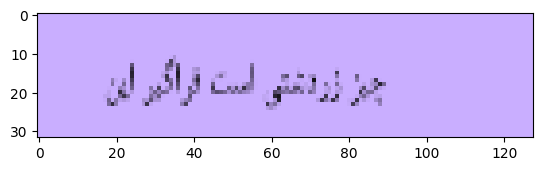

In [ ]:
import matplotlib.pyplot as plt
img=cv2.imread('/content/PaddleOCR/train_data/train/IDback_15773.png')
plt.imshow(img)
img_resi=cv2.resize(img,(128,32))
plt.imshow(img_resi)

In [9]:
!python3 tools/infer_rec.py -c /content/PaddleOCR/pretrained_model/IDPL2/output-IDPL2-ABInet-06/config.yml -o Global.infer_img='/content/PaddleOCR/pretrained_model/IDPL2/output-IDPL2-ABInet-06/test/Lsimple_148885.png' Global.pretrained_model=/content/PaddleOCR/pretrained_model/IDPL2/output-IDPL2-ABInet-06/best_accuracy

[2024/05/25 17:32:37] ppocr INFO: Architecture : 
[2024/05/25 17:32:37] ppocr INFO:     Backbone : 
[2024/05/25 17:32:37] ppocr INFO:         name : ResNet45
[2024/05/25 17:32:37] ppocr INFO:     Head : 
[2024/05/25 17:32:37] ppocr INFO:         iter_size : 3
[2024/05/25 17:32:37] ppocr INFO:         name : ABINetHead
[2024/05/25 17:32:37] ppocr INFO:         use_lang : True
[2024/05/25 17:32:37] ppocr INFO:     Transform : None
[2024/05/25 17:32:37] ppocr INFO:     algorithm : ABINet
[2024/05/25 17:32:37] ppocr INFO:     in_channels : 3
[2024/05/25 17:32:37] ppocr INFO:     model_type : rec
[2024/05/25 17:32:37] ppocr INFO: Eval : 
[2024/05/25 17:32:37] ppocr INFO:     dataset : 
[2024/05/25 17:32:37] ppocr INFO:         data_dir : /media/admin-pc-nezamabadi/Students/Dataset-IDPL-PFOD2-merge-with-DR/test
[2024/05/25 17:32:37] ppocr INFO:         label_file_list : ['/media/admin-pc-nezamabadi/Students/Dataset-IDPL-PFOD2-merge-with-DR/old_txt_files/test.txt']
[2024/05/25 17:32:37] ppocr